### Importación de librerias

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import scipy
import math

### Importar datos


In [169]:
df = pd.read_csv("https://raw.githubusercontent.com/juantoro5/Analitica-para-RH-E7/main/consulta.csv", sep=",")
df

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,...,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,SurveyDate,EmployeeID.1,Attrition,retirementDate,retirementType,resignationReason
0,51,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,...,4.0,2.0,3,3,2015-12-31,NaN,NaN,NaN,NaN,NaN
1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,...,2.0,4.0,2,4,2015-12-31,2.0,Yes,2016-10-15,Resignation,Others
2,32,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,...,2.0,1.0,3,3,2015-12-31,NaN,NaN,NaN,NaN,NaN
3,38,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,...,4.0,3.0,2,3,2015-12-31,NaN,NaN,NaN,NaN,NaN
4,32,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,...,1.0,3.0,3,3,2015-12-31,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8815,42,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,1,...,1.0,3.0,3,3,2016-12-31,NaN,NaN,NaN,NaN,NaN
8816,29,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,1,...,4.0,3.0,2,3,2016-12-31,NaN,NaN,NaN,NaN,NaN
8817,25,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,2,...,3.0,3.0,3,4,2016-12-31,NaN,NaN,NaN,NaN,NaN
8818,42,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,1,...,1.0,3.0,2,3,2016-12-31,NaN,NaN,NaN,NaN,NaN


In [170]:
df.shape

(8820, 35)

### Análisis exploratorio

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8820 entries, 0 to 8819
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      8820 non-null   int64  
 1   BusinessTravel           8820 non-null   object 
 2   Department               8820 non-null   object 
 3   DistanceFromHome         8820 non-null   int64  
 4   Education                8820 non-null   int64  
 5   EducationField           8820 non-null   object 
 6   EmployeeCount            8820 non-null   int64  
 7   EmployeeID               8820 non-null   int64  
 8   Gender                   8820 non-null   object 
 9   JobLevel                 8820 non-null   int64  
 10  JobRole                  8820 non-null   object 
 11  MaritalStatus            8820 non-null   object 
 12  MonthlyIncome            8820 non-null   int64  
 13  NumCompaniesWorked       8782 non-null   float64
 14  Over18                  

In [171]:
# Contar los valores nulos por columna
nulos_por_columna = df.isnull().sum()

# Mostrar el resultado
print(nulos_por_columna)


Age                           0
BusinessTravel                0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeID                    0
Gender                        0
JobLevel                      0
JobRole                       0
MaritalStatus                 0
MonthlyIncome                 0
NumCompaniesWorked           38
Over18                        0
PercentSalaryHike             0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears            18
TrainingTimesLastYear         0
YearsAtCompany                0
YearsSinceLastPromotion       0
YearsWithCurrManager          0
InfoDate                      0
EnvironmentSatisfaction      50
JobSatisfaction              40
WorkLifeBalance              76
JobInvolvement                0
PerformanceRating             0
SurveyDate                    0
EmployeeID.1               8170
Attritio

In [172]:
#Dejar solo el año en retirementDate
df['AñoRetiro'] = pd.to_datetime(df['retirementDate']).dt.year
# Reemplazar 1970 por 0 en la columna en el df
df['AñoRetiro'].replace('1970', '0', inplace=True)

# Cambiar AñoRetiro de numerica a categòrica
df['AñoRetiro'] = df['AñoRetiro'].astype('object')

#Cambiar EmployeeID a texto
df['EmployeeID'] = df['EmployeeID'].astype('string')
df['EmployeeID.1'] = df['EmployeeID.1'].astype('string')


#Eliminar retirementDate
df.drop('retirementDate', axis=1, inplace=True)

# Reemplazar valores nulos por 0 en todo el DataFrame
#df.fillna(0, inplace=True)
#df.replace()

# Reemplazar yes por 1 en la columna en el df
#df['Attrition'].replace('Yes', '1', inplace=True)




df.head(10)



C:\Users\Juan Jose\AppData\Local\Temp\ipykernel_37336\223404245.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AñoRetiro'].replace('1970', '0', inplace=True)


,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,...,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,SurveyDate,EmployeeID.1,Attrition,retirementType,resignationReason,AñoRetiro
0,51,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,...,4.0,2.0,3,3,2015-12-31,<NA>,NaN,NaN,NaN,NaN
1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,...,2.0,4.0,2,4,2015-12-31,2.0,Yes,Resignation,Others,2016.0
2,32,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,...,2.0,1.0,3,3,2015-12-31,<NA>,NaN,NaN,NaN,NaN
3,38,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,...,4.0,3.0,2,3,2015-12-31,<NA>,NaN,NaN,NaN,NaN
4,32,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,...,1.0,3.0,3,3,2015-12-31,<NA>,NaN,NaN,NaN,NaN
5,46,Travel_Rarely,Research & Development,8,3,Life Sciences,1,6,Female,4,...,2.0,2.0,3,3,2015-12-31,<NA>,NaN,NaN,NaN,NaN
6,28,Travel_Rarely,Research & Development,11,2,Medical,1,7,Male,2,...,3.0,1.0,3,4,2015-12-31,7.0,Yes,Resignation,Stress,2016.0
7,29,Travel_Rarely,Research & Development,18,3,Life Sciences,1,8,Male,2,...,2.0,3.0,3,4,2015-12-31,<NA>,NaN,NaN,NaN,NaN
8,31,Travel_Rarely,Research & Development,1,3,Life Sciences,1,9,Male,3,...,4.0,3.0,3,4,2015-12-31,<NA>,NaN,NaN,NaN,NaN
9,25,Non-Travel,Research & Development,7,4,Medical,1,10,Female,4,...,1.0,3.0,3,3,2015-12-31,<NA>,NaN,NaN,NaN,NaN


In [173]:
# Reemplazar 'Yes' por 1, 'No' por 0, y NaN por 0
df['Attrition'].replace({'Yes': 1, 'No': 0, np.nan: 0}, inplace=True)

# Asegurarte de que 'Attrition' sea de tipo entero
df['Attrition'] = df['Attrition'].astype(int)

C:\Users\Juan Jose\AppData\Local\Temp\ipykernel_37336\2032770331.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attrition'].replace({'Yes': 1, 'No': 0, np.nan: 0}, inplace=True)
C:\Users\Juan Jose\AppData\Local\Temp\ipykernel_37336\2032770331.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)

In [174]:
df.head(10)

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,...,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,SurveyDate,EmployeeID.1,Attrition,retirementType,resignationReason,AñoRetiro
0,51,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,...,4.0,2.0,3,3,2015-12-31,<NA>,0,NaN,NaN,NaN
1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,...,2.0,4.0,2,4,2015-12-31,2.0,1,Resignation,Others,2016.0
2,32,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,...,2.0,1.0,3,3,2015-12-31,<NA>,0,NaN,NaN,NaN
3,38,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,...,4.0,3.0,2,3,2015-12-31,<NA>,0,NaN,NaN,NaN
4,32,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,...,1.0,3.0,3,3,2015-12-31,<NA>,0,NaN,NaN,NaN
5,46,Travel_Rarely,Research & Development,8,3,Life Sciences,1,6,Female,4,...,2.0,2.0,3,3,2015-12-31,<NA>,0,NaN,NaN,NaN
6,28,Travel_Rarely,Research & Development,11,2,Medical,1,7,Male,2,...,3.0,1.0,3,4,2015-12-31,7.0,1,Resignation,Stress,2016.0
7,29,Travel_Rarely,Research & Development,18,3,Life Sciences,1,8,Male,2,...,2.0,3.0,3,4,2015-12-31,<NA>,0,NaN,NaN,NaN
8,31,Travel_Rarely,Research & Development,1,3,Life Sciences,1,9,Male,3,...,4.0,3.0,3,4,2015-12-31,<NA>,0,NaN,NaN,NaN
9,25,Non-Travel,Research & Development,7,4,Medical,1,10,Female,4,...,1.0,3.0,3,3,2015-12-31,<NA>,0,NaN,NaN,NaN


In [81]:
#Cambiar attrition a str
#df['Attrition'] = df['Attrition'].astype('str')

In [175]:
df.dtypes

Age                                 int64
BusinessTravel                     object
Department                         object
DistanceFromHome                    int64
Education                           int64
EducationField                     object
EmployeeCount                       int64
EmployeeID                 string[python]
Gender                             object
JobLevel                            int64
JobRole                            object
MaritalStatus                      object
MonthlyIncome                       int64
NumCompaniesWorked                float64
Over18                             object
PercentSalaryHike                   int64
StandardHours                       int64
StockOptionLevel                    int64
TotalWorkingYears                 float64
TrainingTimesLastYear               int64
YearsAtCompany                      int64
YearsSinceLastPromotion             int64
YearsWithCurrManager                int64
InfoDate                          

In [176]:
#Definir variables númericas

df_num= numerical_vars = df.select_dtypes(include=['number'])
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8820 entries, 0 to 8819
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      8820 non-null   int64  
 1   DistanceFromHome         8820 non-null   int64  
 2   Education                8820 non-null   int64  
 3   EmployeeCount            8820 non-null   int64  
 4   JobLevel                 8820 non-null   int64  
 5   MonthlyIncome            8820 non-null   int64  
 6   NumCompaniesWorked       8782 non-null   float64
 7   PercentSalaryHike        8820 non-null   int64  
 8   StandardHours            8820 non-null   int64  
 9   StockOptionLevel         8820 non-null   int64  
 10  TotalWorkingYears        8802 non-null   float64
 11  TrainingTimesLastYear    8820 non-null   int64  
 12  YearsAtCompany           8820 non-null   int64  
 13  YearsSinceLastPromotion  8820 non-null   int64  
 14  YearsWithCurrManager    

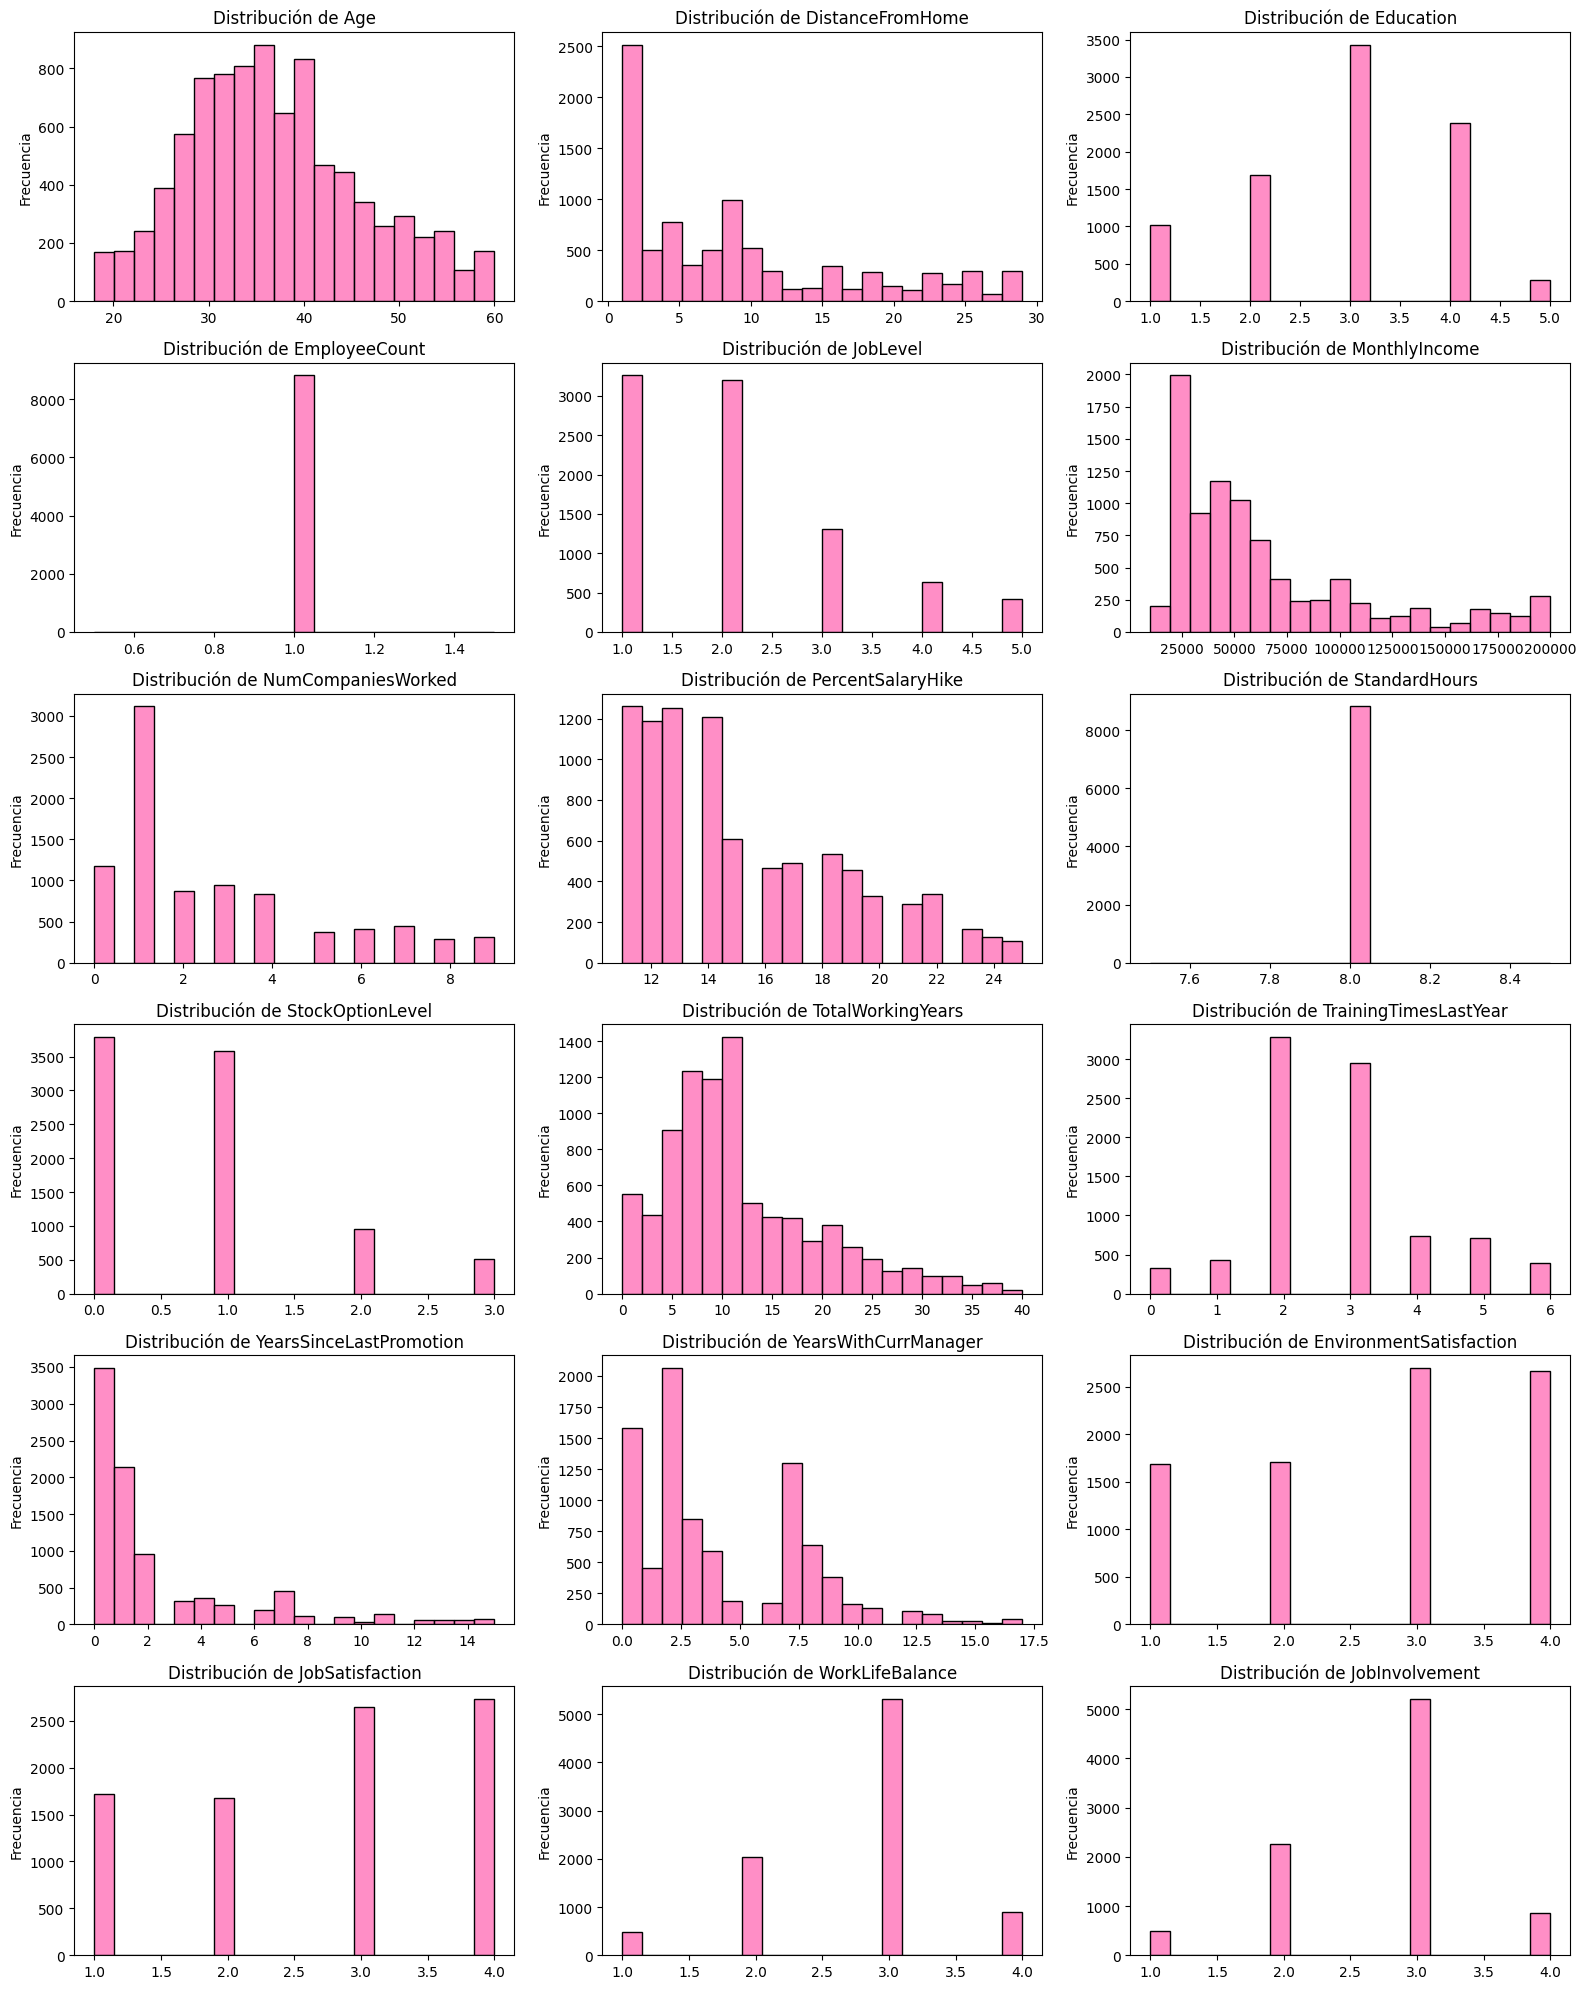

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un esquema de color rosado
color_rosa = "#FF69B4"

# Lista de variables numéricas a graficar
variables = [
    'Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'JobLevel',
    'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours',
    'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
    'YearsSinceLastPromotion', 'YearsWithCurrManager', 'EnvironmentSatisfaction',
    'JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement'
]

# Establecer el tamaño de la figura
plt.figure(figsize=(16, 20))

# Crear un gráfico de distribución (histograma) para cada variable
for i, var in enumerate(variables, 1):
    plt.subplot(6, 3, i)
    sns.histplot(df[var], kde=False, color=color_rosa, bins=20)
    plt.title(f'Distribución de {var}', fontsize=12)
    plt.xlabel('')
    plt.ylabel('Frecuencia')

# Ajustar el diseño de la figura
plt.tight_layout()
plt.show()


vemos que hay 2 variables constantes (Standardhours y Employee count), por lo cual se podrían eliminar. 

### Variables categóricas

In [178]:
#Definir variables categóricas

df_cat= df.select_dtypes(include=['object', 'category'])
df_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,InfoDate,SurveyDate,retirementType,resignationReason,AñoRetiro
0,Travel_Rarely,Sales,Life Sciences,Female,Healthcare Representative,Married,Y,2015-12-31,2015-12-31,NaN,NaN,NaN
1,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Single,Y,2015-12-31,2015-12-31,Resignation,Others,2016.0
2,Travel_Frequently,Research & Development,Other,Male,Sales Executive,Married,Y,2015-12-31,2015-12-31,NaN,NaN,NaN
3,Non-Travel,Research & Development,Life Sciences,Male,Human Resources,Married,Y,2015-12-31,2015-12-31,NaN,NaN,NaN
4,Travel_Rarely,Research & Development,Medical,Male,Sales Executive,Single,Y,2015-12-31,2015-12-31,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
8815,Travel_Rarely,Research & Development,Medical,Female,Research Scientist,Single,Y,2016-12-31,2016-12-31,NaN,NaN,NaN
8816,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Divorced,Y,2016-12-31,2016-12-31,NaN,NaN,NaN
8817,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,2016-12-31,2016-12-31,NaN,NaN,NaN
8818,Travel_Rarely,Sales,Medical,Male,Laboratory Technician,Divorced,Y,2016-12-31,2016-12-31,NaN,NaN,NaN


In [179]:
df_cat.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'InfoDate', 'SurveyDate', 'retirementType',
       'resignationReason', 'AñoRetiro'],
      dtype='object')

In [180]:
#correlacion entre variables categóricas y la VO. si el valor P es menor a 0.05, es decir que hay buena correlación
from scipy.stats import chi2_contingency
import pandas as pd

# Lista de las variables categóricas que deseas comparar con la variable objetivo
variables_categoricas = ['BusinessTravel', 'Department', 'EducationField','Gender','JobRole','MaritalStatus','Over18','InfoDate','SurveyDate','AñoRetiro','retirementType','resignationReason']  # Añade tus variables aquí
variable_objetivo = 'Attrition'

# Iterar sobre las variables categóricas
for var in variables_categoricas:
    # Crea una tabla de contingencia entre la variable categórica y la variable objetivo
    contingency_table = pd.crosstab(df[var], df[variable_objetivo])

    # Realiza el test de chi-cuadrado
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Imprime los resultados para cada variable categórica
    print(f"Variable: {var}")
    print(f"Chi2: {chi2}, P-valor: {p}\n")
    

Variable: BusinessTravel
Chi2: 63.396826394040374, P-valor: 1.712198307611343e-14

Variable: Department
Chi2: 22.31665422096337, P-valor: 1.425607950242864e-05

Variable: EducationField
Chi2: 36.65193292438355, P-valor: 7.032964456227541e-07

Variable: Gender
Chi2: 1.6625906223519444, P-valor: 0.19725390594930822

Variable: JobRole
Chi2: 18.534089050765292, P-valor: 0.017560048736790058

Variable: MaritalStatus
Chi2: 110.22324631925174, P-valor: 1.1623212372325096e-24

Variable: Over18
Chi2: 0.0, P-valor: 1.0

Variable: InfoDate
Chi2: 699.5561284248187, P-valor: 3.7344529245828005e-154

Variable: SurveyDate
Chi2: 699.5561284248187, P-valor: 3.7344529245828005e-154

Variable: AñoRetiro
Chi2: 0.0, P-valor: 1.0

Variable: retirementType
Chi2: 0.0, P-valor: 1.0

Variable: resignationReason
Chi2: 0.0, P-valor: 1.0



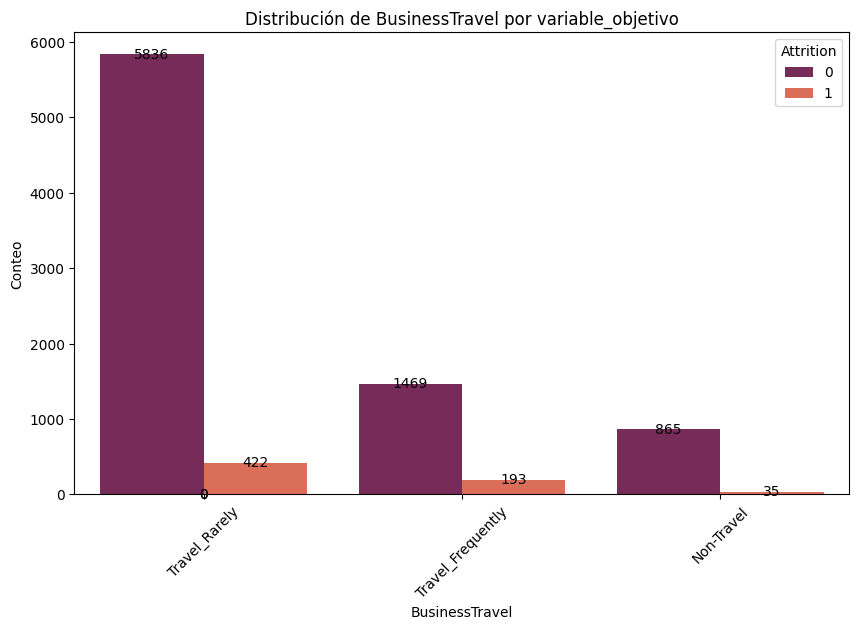

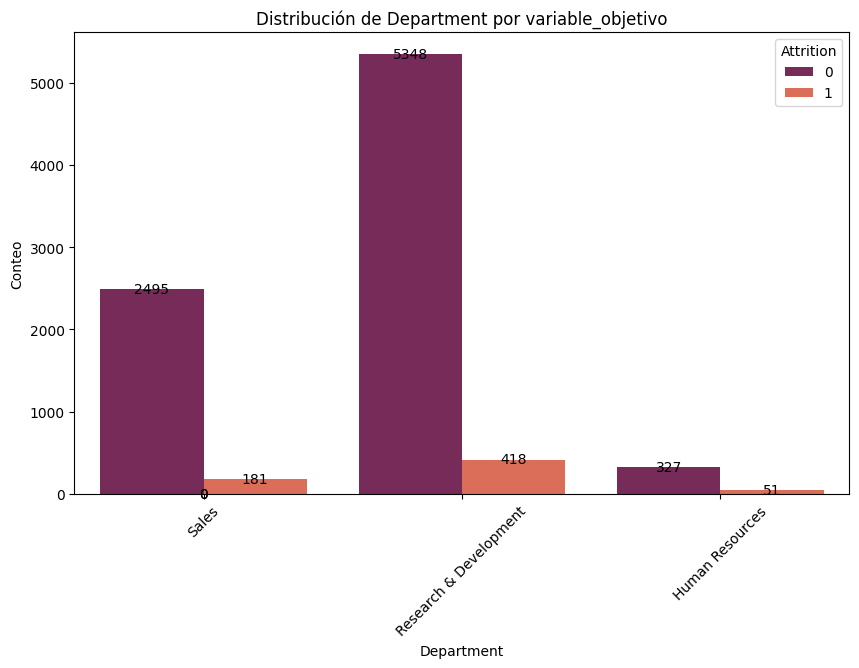

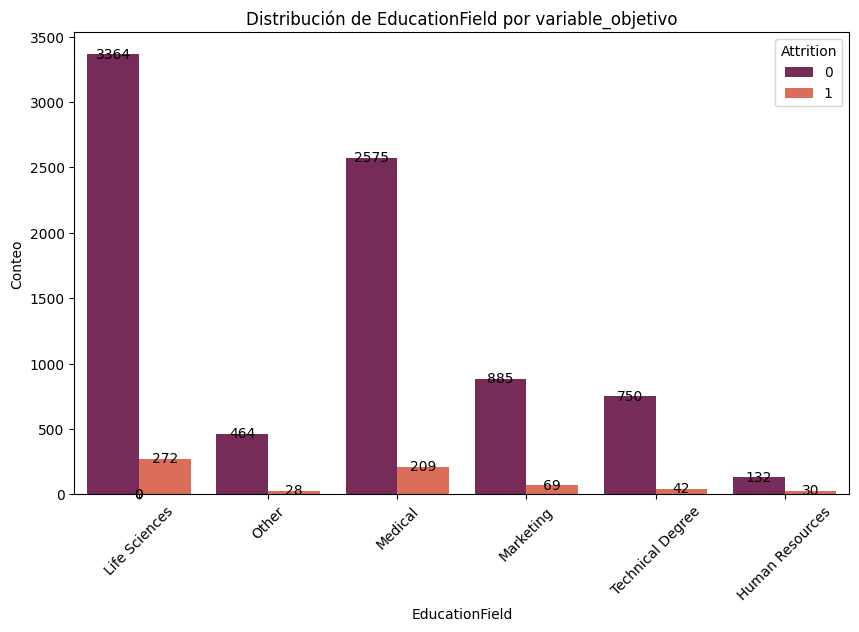

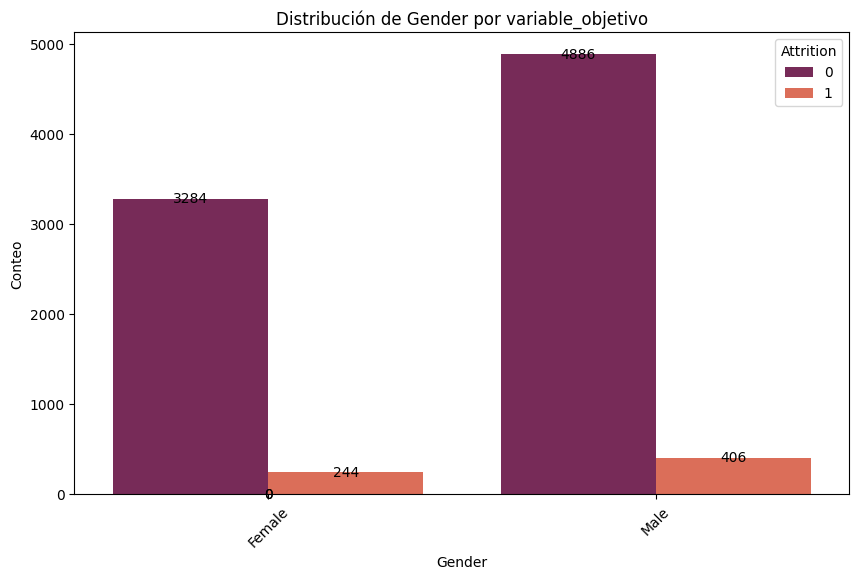

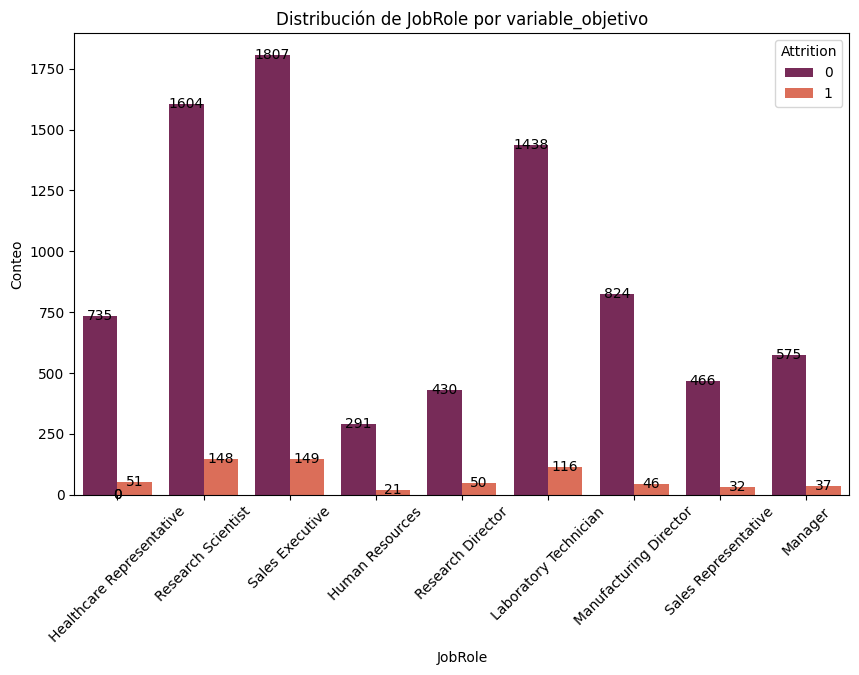

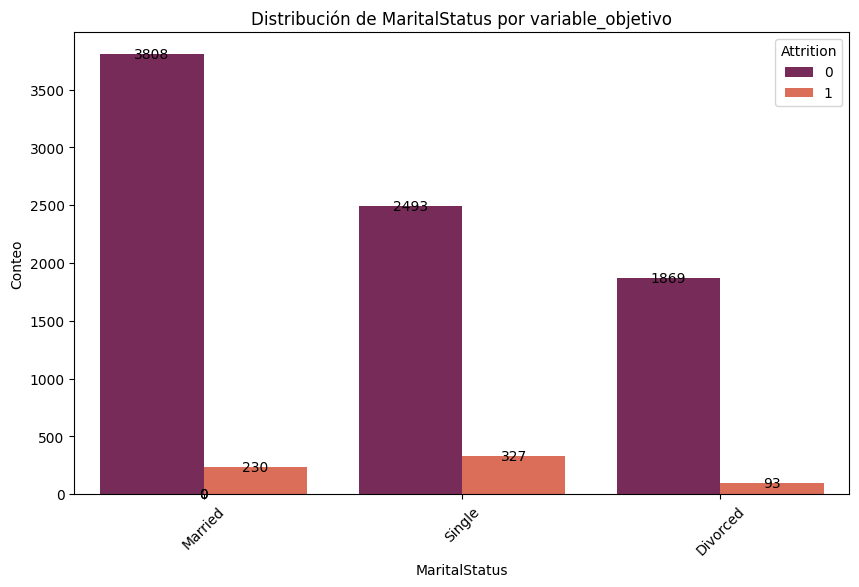

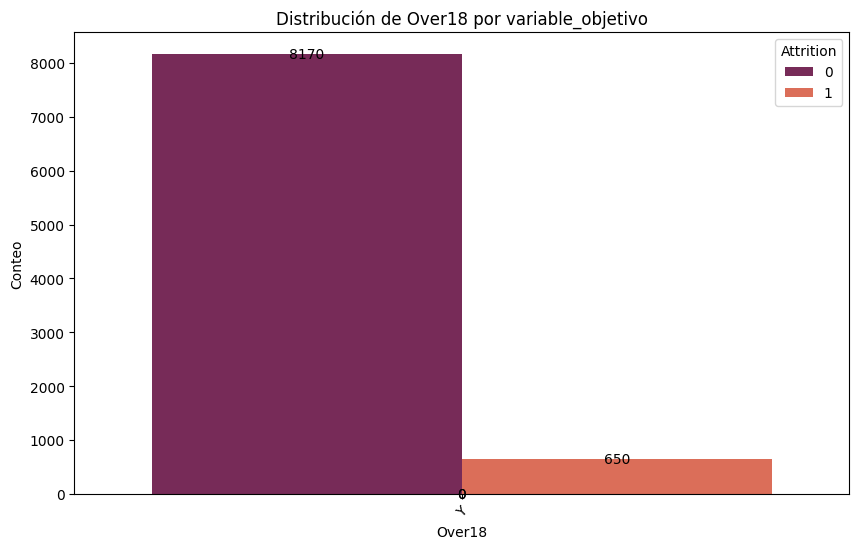

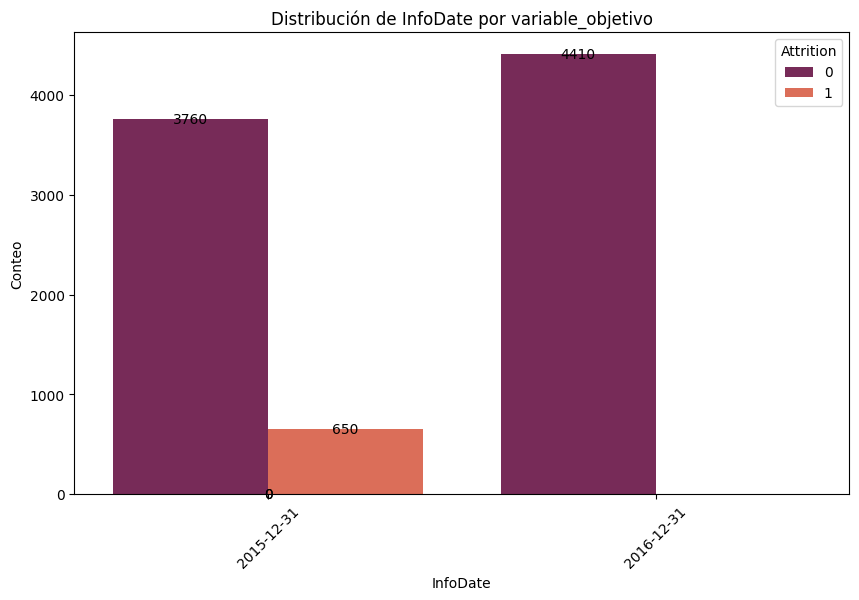

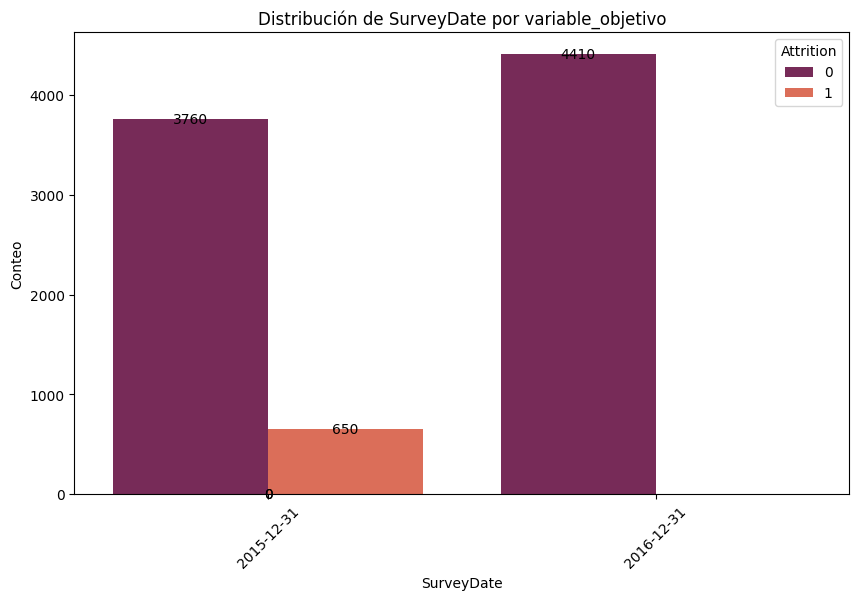

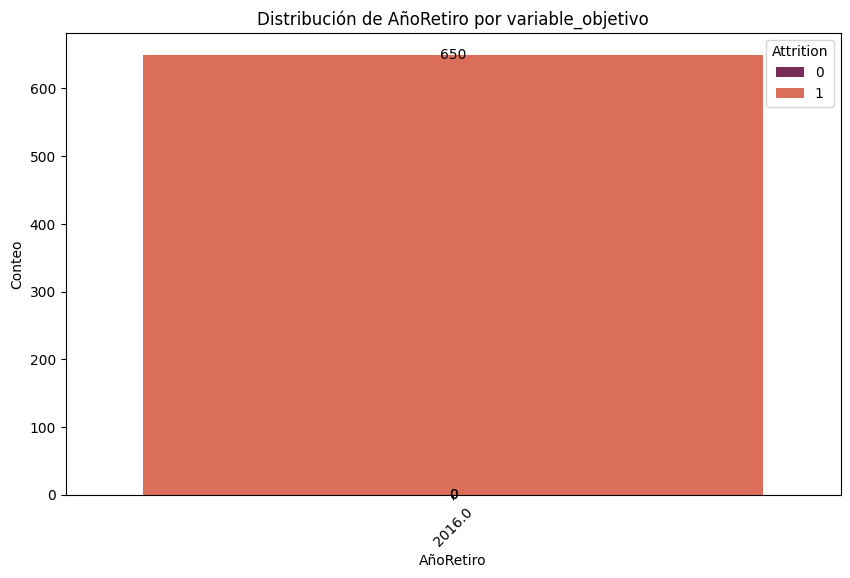

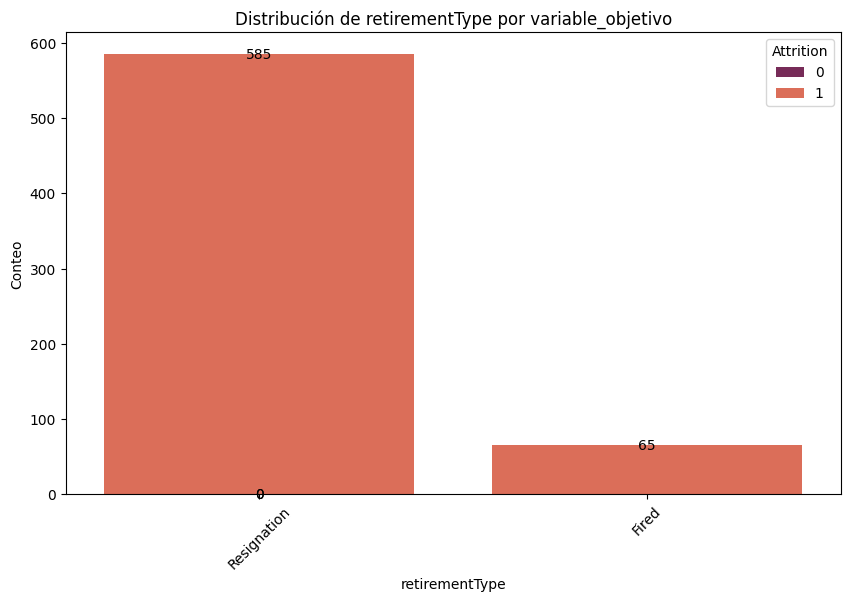

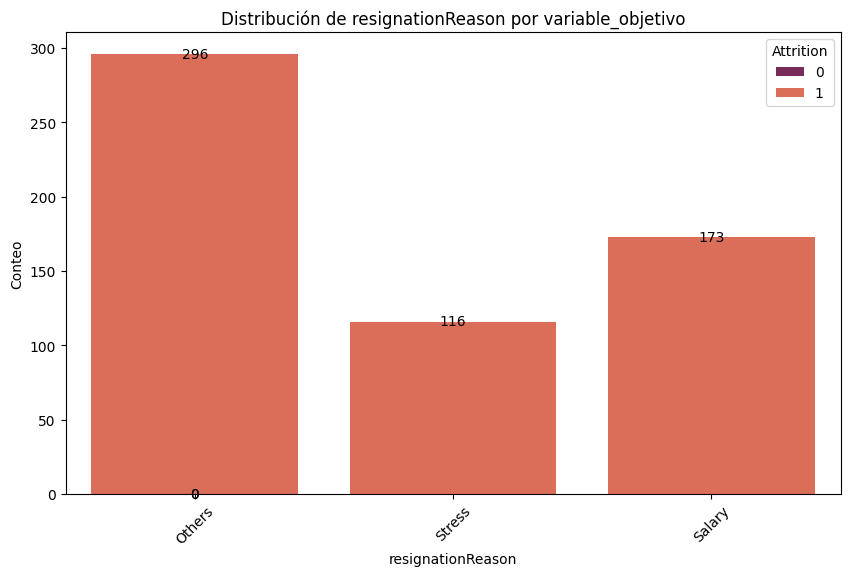

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de variables categóricas a graficar
variables_categoricas = [
    'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
    'MaritalStatus', 'Over18', 'InfoDate', 'SurveyDate', 'AñoRetiro',
    'retirementType', 'resignationReason'
]

# Crear gráficos individualmente para cada variable categórica
for var in variables_categoricas:
    plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura según sea necesario
    ax = sns.countplot(x=var, hue='Attrition', data=df, palette='rocket')
    
    # Añadir el conteo dentro de las barras
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x = p.get_x() + width / 2
        y = p.get_y() + height
        ax.annotate(f'{int(height)}', (x, y), ha='center', va='center')
    
    plt.title(f'Distribución de {var} por variable_objetivo')
    plt.xlabel(var)
    plt.ylabel('Conteo')
    plt.xticks(rotation=45)  # Rota las etiquetas del eje x si es necesario
    plt.show()




Después de hacer la prueba de chi 2 y mirar la correlación entre las variables ccategóricas y la VO (Attrition), podemos ver que algunas variables no tienen tanta correlacion como por ejemplo Gender,JobRole, Over18 por lo cual podrìan eliminarse.

### Correlación entre variables

In [182]:
# Matriz de Correlación

corrmat = df_num.corr()
corrmat

,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Attrition
Age,1.000000,0.006963,-0.035706,NaN,-0.002884,-0.044314,0.299243,-0.033137,NaN,-0.031753,...,-0.027308,0.311309,0.216513,0.202089,0.010089,-0.003086,-0.021297,0.018196,-0.025563,-0.105749
DistanceFromHome,0.006963,1.000000,-0.008638,NaN,-0.037329,-0.021607,-0.013843,0.038125,NaN,0.011169,...,-0.009001,0.031684,0.002290,0.021584,0.020183,-0.011144,0.008000,-0.001837,0.036418,-0.002631
Education,-0.035706,-0.008638,1.000000,NaN,0.045746,0.006410,-0.016250,-0.040531,NaN,0.001261,...,0.010472,0.006080,0.022490,0.005358,-0.045469,-0.004173,-0.006406,-0.018279,-0.035591,-0.009495
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JobLevel,-0.002884,-0.037329,0.045746,NaN,1.000000,0.047316,-0.009875,0.010973,NaN,0.000993,...,-0.032500,-0.064219,-0.060811,-0.055251,-0.024448,-0.018279,-0.027664,-0.012630,-0.002474,-0.005712
MonthlyIncome,-0.044314,-0.021607,0.006410,NaN,0.047316,1.000000,-0.020726,0.004325,NaN,0.026930,...,0.050112,0.000995,0.065219,0.024304,-0.006006,0.005063,0.003572,0.023346,0.016093,-0.022313
NumCompaniesWorked,0.299243,-0.013843,-0.016250,NaN,-0.009875,-0.020726,1.000000,0.030860,NaN,0.017163,...,-0.032286,-0.117959,-0.036656,-0.109667,0.013007,-0.056230,-0.008714,0.027985,0.017819,0.024465
PercentSalaryHike,-0.033137,0.038125,-0.040531,NaN,0.010973,0.004325,0.030860,1.000000,NaN,0.012548,...,-0.037392,-0.029707,-0.029542,-0.040864,0.000841,0.030808,-0.040601,-0.004658,0.773550,0.017768
StandardHours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockOptionLevel,-0.031753,0.011169,0.001261,NaN,0.000993,0.026930,0.017163,0.012548,NaN,1.000000,...,-0.069902,0.007886,0.019063,0.017757,-0.004591,0.039907,-0.022886,0.010295,-0.036348,0.002537


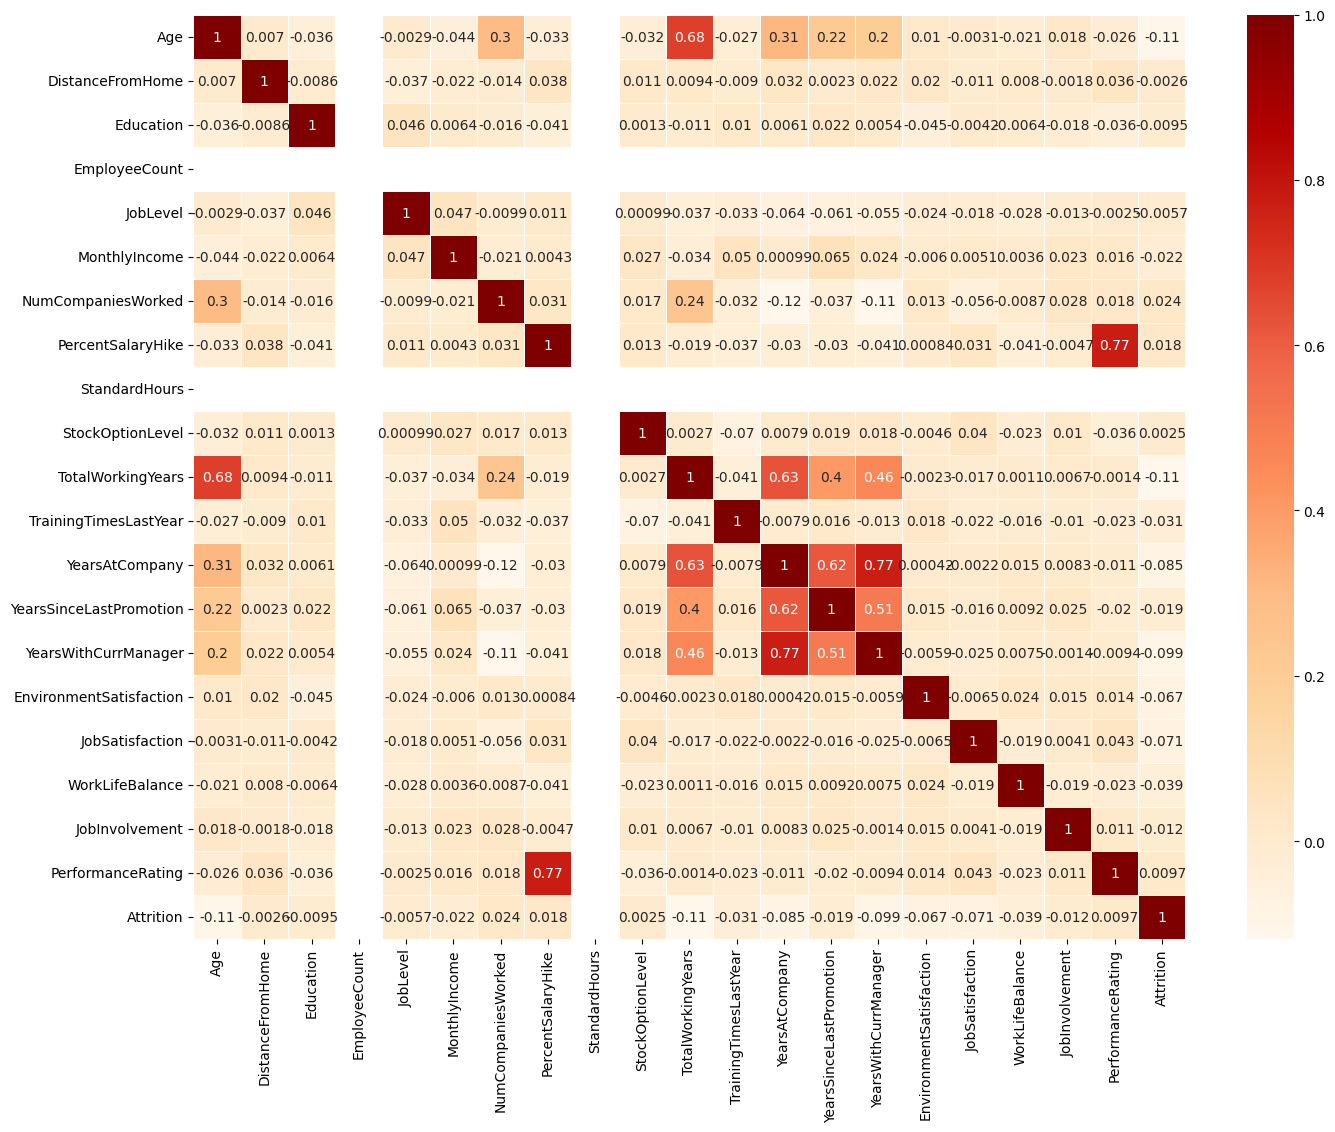

In [183]:
# Heat Map

f, ax = plt.subplots(figsize = (16, 12))
sns.heatmap(corrmat, annot = True,  cmap ='OrRd', linewidths=.5)
plt.show()

#### convertir categóricas a dummies

In [184]:
# Reemplazar valores faltantes con 0
df_cat = df_cat.fillna(0)



C:\Users\Juan Jose\AppData\Local\Temp\ipykernel_37336\481434439.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cat = df_cat.fillna(0)


In [185]:
# pasar variables categóricas a dummies
df_cat_dummies = pd.get_dummies(df_cat)

# Convertir todas las columnas booleanas en el DataFrame resultante a 0 y 1
df_cat_dummies = df_cat_dummies.astype(int)

df_cat_dummies.head(4)

,AñoRetiro,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,...,InfoDate_2016-12-31,SurveyDate_2015-12-31,SurveyDate_2016-12-31,retirementType_0,retirementType_Fired,retirementType_Resignation,resignationReason_0,resignationReason_Others,resignationReason_Salary,resignationReason_Stress
0,0,0,0,1,0,0,1,0,1,0,...,0,1,0,1,0,0,1,0,0,0
1,2016,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
3,0,1,0,0,0,1,0,0,1,0,...,0,1,0,1,0,0,1,0,0,0


### Escalado de variables numéricas

In [92]:
# escalado de varibales numéricas

#from sklearn.preprocessing import MinMaxScaler

# Creamos el objeto del escalador MinMax
#scaler = MinMaxScaler()

# Escalamos las variables numéricas
#df_num_scaled = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)

In [186]:
from sklearn.preprocessing import MinMaxScaler

# Excluir la columna 'Attrition' del escalado
df_num_sin_attrition = df_num.drop(columns=['Attrition'])

# Creamos el objeto del escalador MinMax
scaler = MinMaxScaler()

# Escalamos las variables numéricas, excepto 'Attrition'
df_num_scaled = pd.DataFrame(scaler.fit_transform(df_num_sin_attrition), columns=df_num_sin_attrition.columns)

# Volver a añadir la columna 'Attrition' sin escalar
df_num_scaled['Attrition'] = df_num['Attrition'].values


In [187]:
df_num_scaled.head(4)

,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Attrition
0,0.785714,0.178571,0.25,0.0,0.00,0.637546,0.111111,0.000000,0.0,0.000000,...,1.000000,0.025,0.000000,0.000000,0.666667,1.000000,0.333333,0.666667,0.0,0
1,0.309524,0.321429,0.00,0.0,0.00,0.167457,0.000000,0.857143,0.0,0.333333,...,0.500000,0.125,0.066667,0.235294,0.666667,0.333333,1.000000,0.333333,1.0,1
2,0.333333,0.571429,0.75,0.0,0.75,0.964666,0.111111,0.285714,0.0,1.000000,...,0.333333,0.125,0.000000,0.176471,0.333333,0.333333,0.000000,0.666667,0.0,0
3,0.476190,0.035714,1.00,0.0,0.50,0.385045,0.333333,0.000000,0.0,1.000000,...,0.833333,0.200,0.466667,0.294118,1.000000,1.000000,0.666667,0.333333,0.0,0


### Concatenar

In [188]:
# Concatenar los DataFrames df_nums_scaled y df_cats_dummies
df_final = pd.concat([df_num_scaled, df_cat_dummies], axis=1)

In [189]:
df_final

,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,...,InfoDate_2016-12-31,SurveyDate_2015-12-31,SurveyDate_2016-12-31,retirementType_0,retirementType_Fired,retirementType_Resignation,resignationReason_0,resignationReason_Others,resignationReason_Salary,resignationReason_Stress
0,0.785714,0.178571,0.25,0.0,0.00,0.637546,0.111111,0.000000,0.0,0.000000,...,0,1,0,1,0,0,1,0,0,0
1,0.309524,0.321429,0.00,0.0,0.00,0.167457,0.000000,0.857143,0.0,0.333333,...,0,1,0,0,0,1,0,1,0,0
2,0.333333,0.571429,0.75,0.0,0.75,0.964666,0.111111,0.285714,0.0,1.000000,...,0,1,0,1,0,0,1,0,0,0
3,0.476190,0.035714,1.00,0.0,0.50,0.385045,0.333333,0.000000,0.0,1.000000,...,0,1,0,1,0,0,1,0,0,0
4,0.333333,0.321429,0.00,0.0,0.00,0.070195,0.444444,0.071429,0.0,0.666667,...,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8815,0.571429,0.142857,0.75,0.0,0.00,0.264350,0.333333,0.428571,0.0,0.333333,...,1,0,1,1,0,0,1,0,0,0
8816,0.261905,0.035714,0.75,0.0,0.00,0.087941,0.222222,0.285714,0.0,0.000000,...,1,0,1,1,0,0,1,0,0,0
8817,0.166667,0.857143,0.25,0.0,0.25,0.141811,0.000000,0.642857,0.0,0.000000,...,1,0,1,1,0,0,1,0,0,0
8818,0.571429,0.607143,0.25,0.0,0.00,0.073144,0.000000,0.214286,0.0,0.333333,...,1,0,1,1,0,0,1,0,0,0


In [190]:
df_final.columns

Index(['Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'JobLevel',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating', 'Attrition',
       'AñoRetiro', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Techn

In [145]:
df_final.info

<bound method DataFrame.info of            Age  DistanceFromHome  Education  EmployeeCount  JobLevel  \
0     0.785714          0.178571       0.25            0.0      0.00   
1     0.309524          0.321429       0.00            0.0      0.00   
2     0.333333          0.571429       0.75            0.0      0.75   
3     0.476190          0.035714       1.00            0.0      0.50   
4     0.333333          0.321429       0.00            0.0      0.00   
...        ...               ...        ...            ...       ...   
8815  0.571429          0.142857       0.75            0.0      0.00   
8816  0.261905          0.035714       0.75            0.0      0.00   
8817  0.166667          0.857143       0.25            0.0      0.25   
8818  0.571429          0.607143       0.25            0.0      0.00   
8819  0.523810          0.964286       0.50            0.0      0.25   

      MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  StandardHours  \
0          0.637546       

### Seleccion de Variables

Hasta ahora se han aplicado pruebas entre variables categoricas, como Chi-cuadrado, diagrama de correlacion y filtrado

S.V para variables numericas

Correlacion de Pearson

In [191]:
# Reemplazar los valores NaN en 'Attrition' con un valor (por ejemplo, 0 o 1 según el contexto)
df_final['Attrition'].fillna(0, inplace=True)  # O ajusta el valor según lo que tenga sentido

# Asegurarse de que 'Attrition' esté codificada como 0 y 1
df_final['Attrition'] = df_final['Attrition'].replace({'Yes': 1, 'No': 0})

# Convertir la columna 'Attrition' a tipo entero
df_final['Attrition'] = df_final['Attrition'].astype(int)

# Filtrar solo las columnas numéricas (sin incluir 'Attrition')
df_numericas = df_final.select_dtypes(include=['int64', 'float64']).drop(columns=['Attrition'])

# Calcular la correlación de Pearson entre las variables numéricas y 'Attrition'
correlaciones = df_numericas.corrwith(df_final['Attrition'])

# Ordenar las correlaciones para ver las más fuertes primero
correlaciones = correlaciones.sort_values(ascending=False)

# Mostrar las correlaciones
print(correlaciones)


AñoRetiro                            1.000000
retirementType_Resignation           0.944932
resignationReason_Others             0.660661
resignationReason_Salary             0.501470
resignationReason_Stress             0.409283
retirementType_Fired                 0.305480
SurveyDate_2015-12-31                0.282063
InfoDate_2015-12-31                  0.282063
MaritalStatus_Single                 0.110890
BusinessTravel_Travel_Frequently     0.078250
EducationField_Human Resources       0.058369
Department_Human Resources           0.049585
JobRole_Research Director            0.027978
NumCompaniesWorked                   0.024465
JobRole_Research Scientist           0.020539
PercentSalaryHike                    0.017768
Gender_Male                          0.014173
PerformanceRating                    0.009706
JobRole_Sales Executive              0.005066
EducationField_Medical               0.003576
EducationField_Life Sciences         0.003562
StockOptionLevel                  

C:\Users\Juan Jose\AppData\Local\Temp\ipykernel_37336\1046843142.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final['Attrition'].fillna(0, inplace=True)  # O ajusta el valor según lo que tenga sentido
c:\Users\Juan Jose\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Juan Jose\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning

In [192]:
conteo_unos = df_final['Attrition'].sum()
conteo_ceros = len(df_final) - conteo_unos

print("Número de unos en Attrition:", conteo_unos)
print("Número de ceros en Attrition:", conteo_ceros)

Número de unos en Attrition: 650
Número de ceros en Attrition: 8170


Variables a eliminar: Standardhours y Employee count, gender, jobrole, over18

Variables a Eliminar Basadas en Chi-cuadrado y Pearson: 

-Over18
-AñoRetiro
-retirementType
-resignationReason
-NumCompaniesWorked
-PercentSalaryHike
-PerformanceRating
-StockOptionLevel
-(Elige una de las siguientes) retirementType_Resignation o resignationReason_Others
-(Elige una de las siguientes) SurveyDate_2015-12-31 o InfoDate_2015-12-31